# Get the data

In [527]:
import pandas as pd
train_set=pd.read_csv('anotherdataset/train.csv')
test_set=pd.read_csv('anotherdataset/test.csv')

In [528]:
#快速查看数据结构
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 探索性数据分析

In [529]:
import matplotlib.pyplot as plt
train_set.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

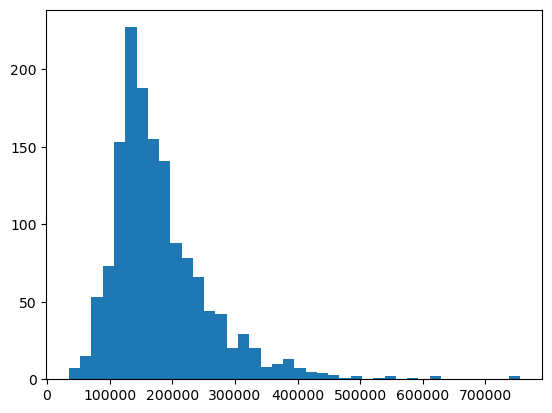

In [530]:
#价格分布
SalePrice=train_set['SalePrice'].values
plt.hist(SalePrice, bins=40)
plt.show()

In [531]:
#查看训练数据属性
train_set.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [532]:
#把训练集分成数值类型和类别类型
train_set_cat = train_set.select_dtypes(include='object')
train_set_cat['SalePrice'] = train_set['SalePrice']
train_set_num = train_set.select_dtypes(include='number')
train_set_num['SalePrice'] = train_set['SalePrice']

In [533]:
#方差分析
from scipy.stats import f_oneway
def ANOVA(df, feature):
    category_groups = df.groupby(feature)['SalePrice'].apply(list)
    return f_oneway(*category_groups)

In [534]:
p_vals = {}
for col in train_set_cat.columns:
    p_vals[col] = ANOVA(train_set_cat, col).statistic
p_vals.pop('SalePrice')

d:\Anaconda\lib\site-packages\scipy\stats\stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


inf

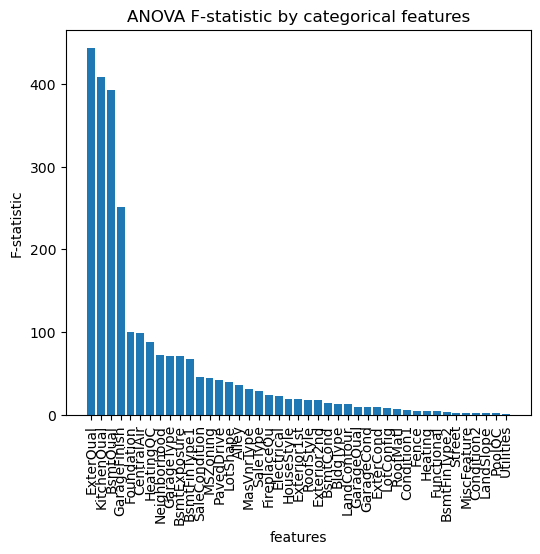

In [535]:
# 提取F统计量    
fs = list(p_vals.values())   
# 获取特征名称    
features = list(p_vals.keys())    
# 对特征和F值进行排序 
sorted_features_fs = sorted(zip(fs, features), reverse=True)  
plt.figure(figsize=(6, 5))    
# 使用sorted_features_fs创建条形图  
plt.bar([fs for _, fs in sorted_features_fs],[feature for feature, _ in sorted_features_fs])    
plt.xlabel('features')    
plt.ylabel('F-statistic')    
plt.title('ANOVA F-statistic by categorical features')   
plt.xticks(rotation='vertical')  
plt.show()

In [536]:
#最先查看前十个影响因子，后面选取不同的数量比较了一下训练效果，最后选取了30个
cat_features=sorted(p_vals, key=p_vals.get, reverse=True)[:30]

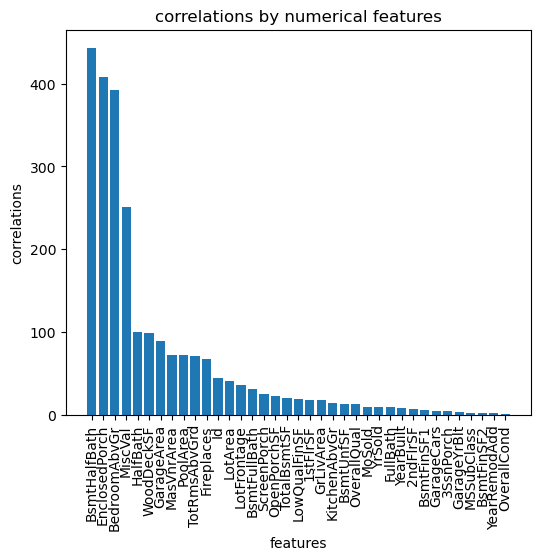

In [537]:
#皮尔逊相关系数
corr = train_set_num.corr(method='pearson')
corr = corr.SalePrice.apply(abs).to_dict()
corr.pop('SalePrice')
 #可视化
co = list(corr.values())    
features = list(corr.keys())    
sorted_features_co = sorted(zip(fs, features), reverse=True)  
plt.figure(figsize=(6, 5))    
# 使用sorted_features_fs创建条形图  
plt.bar([fs for _, fs in sorted_features_co],[feature for feature, _ in sorted_features_co])    
plt.xlabel('features')    
plt.ylabel('correlations')    
plt.title('correlations by numerical features')   
plt.xticks(rotation='vertical')  
plt.show()
#这里我取出了相关性系数大于0.1的前27个值
num_fetures=sorted(corr, key=corr.get, reverse=True)[:27]


In [538]:
features = cat_features+num_fetures
train_set[features].head(5)

,ExterQual,KitchenQual,BsmtQual,GarageFinish,Foundation,CentralAir,HeatingQC,Neighborhood,GarageType,BsmtExposure,...,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,KitchenAbvGr,EnclosedPorch,ScreenPorch,PoolArea
0,Gd,Gd,Gd,RFn,PConc,Y,Ex,CollgCr,Attchd,No,...,61,1,8450,1,150,3,1,0,0,0
1,TA,TA,Gd,RFn,CBlock,Y,Ex,Veenker,Attchd,Gd,...,0,0,9600,0,284,3,1,0,0,0
2,Gd,Gd,Gd,RFn,PConc,Y,Ex,CollgCr,Attchd,Mn,...,42,1,11250,1,434,3,1,0,0,0
3,TA,Gd,TA,Unf,BrkTil,Y,Gd,Crawfor,Detchd,No,...,35,0,9550,1,540,3,1,272,0,0
4,Gd,Gd,Gd,RFn,PConc,Y,Ex,NoRidge,Attchd,Av,...,84,1,14260,1,490,4,1,0,0,0


# 数据预处理

In [539]:
from sklearn.model_selection import  train_test_split
X = train_set[features].loc[:, train_set[features].columns != "SalePrice"]
y = train_set['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
y_train=y_train.values
y_test=y_test.values


In [540]:
#标准化数据
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalizedVars = scaler.fit_transform(X_train[num_fetures])
normalizedVars_df = pd.DataFrame(normalizedVars, columns=scaler.get_feature_names_out())
normalizedVars_df=normalizedVars_df.fillna(0)
normalizedVars_df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,KitchenAbvGr,EnclosedPorch,ScreenPorch,PoolArea
0,-0.814510,0.409702,0.300151,0.304482,-2.409786,0.357997,0.777240,0.904458,0.191477,-0.388719,...,-0.708671,-0.762856,-0.047139,-0.818456,-1.273719,1.395129,4.289499,-0.348941,-0.276572,-0.068863
1,-0.814510,-1.202403,0.300151,-0.168138,-0.439843,-0.701592,-1.056514,-0.957985,0.093313,-0.534021,...,-0.708671,-0.762856,0.260462,1.105226,-1.044439,0.147755,-0.210305,-0.348941,-0.276572,-0.068863
2,1.376546,-0.377158,0.300151,0.356995,0.608969,0.415132,0.777240,-0.337171,1.140397,1.015861,...,-0.153631,-0.762856,-0.417690,1.105226,-0.237461,-1.099619,-0.210305,-0.348941,-0.276572,-0.068863
3,-0.814510,0.242734,0.300151,0.695945,0.850652,1.253973,0.777240,0.283644,0.191477,-0.388719,...,-0.708671,-0.762856,0.225553,1.105226,-1.273719,0.147755,-0.210305,-0.348941,-0.276572,-0.068863
4,-0.814510,-0.747559,-1.059294,-1.313884,-0.868488,-1.267745,-1.056514,-0.957985,-0.986493,-1.696432,...,-0.708671,1.242873,-0.467287,-0.818456,0.245827,0.147755,-0.210305,-0.348941,-0.276572,-0.068863


In [541]:
#独热编码
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder(handle_unknown='ignore')
categoricalVars = enc.fit_transform(X_train[cat_features]).toarray()
categoricalVars_df = pd.DataFrame(categoricalVars, columns=enc.get_feature_names_out())
categoricalVars_df=categoricalVars_df.fillna(0.0)  #在这里用0.0填充了缺失值
categoricalVars_df.head()


,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,...,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_nan,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [542]:
#合并数据
X_train_cleaned = pd.concat([categoricalVars_df, normalizedVars_df], axis='columns')
X_train_cleaned.head()

,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,...,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,KitchenAbvGr,EnclosedPorch,ScreenPorch,PoolArea
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.708671,-0.762856,-0.047139,-0.818456,-1.273719,1.395129,4.289499,-0.348941,-0.276572,-0.068863
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.708671,-0.762856,0.260462,1.105226,-1.044439,0.147755,-0.210305,-0.348941,-0.276572,-0.068863
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.153631,-0.762856,-0.417690,1.105226,-0.237461,-1.099619,-0.210305,-0.348941,-0.276572,-0.068863
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.708671,-0.762856,0.225553,1.105226,-1.273719,0.147755,-0.210305,-0.348941,-0.276572,-0.068863
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.708671,1.242873,-0.467287,-0.818456,0.245827,0.147755,-0.210305,-0.348941,-0.276572,-0.068863


In [543]:
#按一样的步骤操作测试集
X_test_categorical = enc.transform(X_test[cat_features]).toarray()
X_test_categorical_df = pd.DataFrame(X_test_categorical, columns = enc.get_feature_names_out())
X_test_categorical_df=X_test_categorical_df.fillna(0)
X_test_normalized = scaler.transform(X_test[num_fetures])
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=scaler.get_feature_names_out())
X_test_normalized_df=X_test_normalized_df.fillna(0.0)
x_test_cleaned = pd.concat([X_test_categorical_df, X_test_normalized_df], axis='columns')
x_test_cleaned.head()

,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,...,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,KitchenAbvGr,EnclosedPorch,ScreenPorch,PoolArea
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.708671,-0.762856,-0.210334,-0.818456,-0.383571,0.147755,-0.210305,-0.348941,-0.276572,-0.068863
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,-0.241269,1.242873,0.156116,1.105226,-0.304896,0.147755,-0.210305,-0.348941,-0.276572,-0.068863
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.708671,-0.762856,-0.158256,-0.818456,0.992113,-1.099619,-0.210305,1.787074,-0.276572,-0.068863
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.358120,-0.762856,-0.535961,-0.818456,0.086230,0.147755,-0.210305,0.242571,-0.276572,-0.068863
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.708671,-0.762856,0.217350,1.105226,0.070495,-1.099619,-0.210305,-0.348941,-0.276572,-0.068863


# 模型训练

In [544]:
import torch  
import torch.nn as nn  
import torch.optim as optim  
from torch.utils.data import DataLoader, TensorDataset  
  
# 准备数据集  
# 假设 X_train_cleaned 是训练特征，y_train 是训练标签  
# 假设 X_test_cleaned 是测试特征，y_test 是测试标签  
X_train_tensor=torch.FloatTensor(X_train_cleaned.values)
y_train_tensor=torch.FloatTensor(y_train)

train_data = TensorDataset(X_train_tensor,y_train_tensor)  
test_data = TensorDataset(torch.FloatTensor(x_test_cleaned.values), torch.FloatTensor(y_test))  
  
train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)  
test_loader = DataLoader(dataset=test_data, batch_size=32, shuffle=False)  
  
# 定义神经网络模型  
# class NeuralNetwork(nn.Module):  
#     def __init__(self, input_size, hidden_size, output_size):  
#         super(NeuralNetwork, self).__init__()  
#         self.fc1 = nn.Linear(input_size, hidden_size)  
#         self.relu = nn.ReLU()  
#         self.fc2=nn.Linear(hidden_size,hidden_size) 
#         self.relu = nn.ReLU()  
#         self.fc3=nn.Linear(hidden_size,hidden_size) 
#         self.relu = nn.ReLU()  
#         self.fc4=nn.Linear(hidden_size,hidden_size) 
#         self.relu = nn.ReLU()  
#         self.fc5=nn.Linear(hidden_size,hidden_size) 
#         self.relu = nn.ReLU()  
#         self.fc6=nn.Linear(hidden_size,output_size)
#     def forward(self, x):  
#         out = self.fc1(x)  
#         out = self.relu(out)  
#         out = self.fc2(out)
#         out =self.relu(out)
#         out=self.fc3(out)
#         out =self.relu(out)  
#         out = self.fc4(out)  
#         out = self.relu(out)
#         out = self.fc5(out)  
#         out = self.relu(out)
#         out = self.fc6(out)  
#         return out  
class NeuralNetwork(nn.Module):
    def __init__(self,input_size):
        super(NeuralNetwork,self).__init__()
        self.hidden_layer1 = nn.Linear(input_size,1024)
        self.hidden_layer2 = nn.Linear(1024,1024)
        self.hidden_layer3 = nn.Linear(1024,1024)
        self.hidden_layer4 = nn.Linear(1024,1024)
        self.hidden_layer5 = nn.Linear(1024,1024)
        self.hidden_layer6 = nn.Linear(1024,1024)
        self.output_layer = nn.Linear(1024,1)
        self.dropout = nn.Dropout(p=0.2) 
        nn.init.xavier_uniform_(self.hidden_layer1.weight)
        nn.init.xavier_uniform_(self.hidden_layer2.weight)
        nn.init.xavier_uniform_(self.hidden_layer3.weight)
        nn.init.xavier_uniform_(self.hidden_layer4.weight)
        nn.init.xavier_uniform_(self.hidden_layer5.weight)
        nn.init.xavier_uniform_(self.hidden_layer6.weight)
        nn.init.xavier_uniform_(self.output_layer.weight)
    def forward(self,x):
        inputs = x
        layer1_out = torch.nn.functional.gelu(self.hidden_layer1(inputs))
        layer1_out = self.dropout(layer1_out)
        layer2_out = torch.nn.functional.gelu(self.hidden_layer2(layer1_out))
        layer2_out = self.dropout(layer2_out)
        layer3_out = torch.nn.functional.gelu(self.hidden_layer3(layer2_out))
        layer3_out = self.dropout(layer3_out)
        layer4_out = torch.nn.functional.gelu(self.hidden_layer4(layer3_out))
        layer4_out = self.dropout(layer4_out)
        layer5_out = torch.nn.functional.gelu(self.hidden_layer5(layer4_out))
        layer5_out = self.dropout(layer5_out)
        layer6_out = torch.nn.functional.gelu(self.hidden_layer6(layer5_out))
        layer6_out = self.dropout(layer6_out)
        output = torch.relu(self.output_layer(layer6_out))
        return output
# 实例化模型，设置超参数  
model = NeuralNetwork(input_size=X_train_cleaned.shape[1],   
                        )  # 根据实际情况修改input_size和output_size的值  
  
# 定义损失函数和优化器  
criterion = nn.MSELoss()  # 使用均方误差损失
optimizer = optim.Adam(model.parameters(), lr=0.006,weight_decay=0.00001)  # 使用Adam优化器  
  
# 训练模型  
for epoch in range(50):  # 根据需要修改训练轮数  
    train_loss = 0  
    val_loss = 0  
    for i, (inputs, labels) in enumerate(train_loader):    
        model.zero_grad()  # 清零梯度  
        outputs = model(inputs)  # 前向传播  
        loss = criterion(outputs, labels)  # 计算损失  
        loss.backward()  # 反向传播  
        optimizer.step()  # 更新权重  
        train_loss = loss.sqrt()  
          
    # 在验证集上评估模型性能  
    with torch.no_grad():  # 不需要计算梯度，也不需要更新权重  
        predictions = model(torch.FloatTensor(x_test_cleaned.values))  # 前向传播得到预测值  
        val_loss = torch.sqrt(criterion(predictions, torch.FloatTensor(y_test)))  # 计算验证集的均方根误差（RMSE）  
      
    print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}'.format(epoch+1, 200, train_loss/len(train_loader), val_loss.item()))  # 打印每轮的训练损失和验证损失，item()函数用于将tensor转换为python标量

d:\Anaconda\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
d:\Anaconda\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([25])) that is different to the input size (torch.Size([25, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
d:\Anaconda\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([219])) that is different to the input size (torch.Size([219, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.redu

Epoch [1/200], Train Loss: 4072.4907, Val Loss: 201626.2969
Epoch [2/200], Train Loss: 5541.2168, Val Loss: 167387.8750
Epoch [3/200], Train Loss: 2382.6084, Val Loss: 101306.3984
Epoch [4/200], Train Loss: 1545.1788, Val Loss: 94844.1094
Epoch [5/200], Train Loss: 2930.7639, Val Loss: 94423.5938
Epoch [6/200], Train Loss: 1320.4763, Val Loss: 107341.1406
Epoch [7/200], Train Loss: 2097.6702, Val Loss: 100188.1094
Epoch [8/200], Train Loss: 1717.6681, Val Loss: 92906.7344
Epoch [9/200], Train Loss: 2440.7046, Val Loss: 95885.3906
Epoch [10/200], Train Loss: 1642.2205, Val Loss: 92997.9609
Epoch [11/200], Train Loss: 1509.2452, Val Loss: 93332.5234
Epoch [12/200], Train Loss: 2655.5256, Val Loss: 104461.1953
Epoch [13/200], Train Loss: 2140.7686, Val Loss: 102975.7422
Epoch [14/200], Train Loss: 2170.1677, Val Loss: 92944.3359
Epoch [15/200], Train Loss: 1805.8506, Val Loss: 99112.2969


KeyboardInterrupt: 

# 预测房价

In [ ]:
test_features = [feature for feature in features if feature != 'SalePrice']
X_test_df = test_set[test_features]
X_test_categorical = enc.transform(X_test_df[cat_features]).toarray()
X_test_categorical_df = pd.DataFrame(X_test_categorical, columns = enc.get_feature_names_out())
X_test_normalized = scaler.transform(X_test_df[num_fetures])
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=scaler.get_feature_names_out())
X_test_cleaned = pd.concat([X_test_categorical_df, X_test_normalized_df], axis='columns')
X_test_cleaned

,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,...,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,KitchenAbvGr,EnclosedPorch,ScreenPorch,PoolArea
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.708671,-0.762856,0.095645,-0.818456,-0.666800,-1.099619,-0.210305,-0.348941,1.832340,-0.068863
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.182844,1.242873,0.347925,-0.818456,-0.361092,0.147755,-0.210305,-0.348941,-0.276572,-0.068863
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.212056,1.242873,0.306244,-0.818456,-0.965764,0.147755,-0.210305,-0.348941,-0.276572,-0.068863
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.182844,1.242873,-0.061159,-0.818456,-0.545416,0.147755,-0.210305,-0.348941,-0.276572,-0.068863
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.489047,-0.762856,-0.535484,-0.818456,1.012344,-1.099619,-0.210305,-0.348941,2.254123,-0.068863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.708671,1.242873,-0.828205,-0.818456,-0.046393,0.147755,-0.210305,-0.348941,-0.276572,-0.068863
1455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.358120,1.242873,-0.832211,-0.818456,-0.612851,0.147755,-0.210305,-0.348941,-0.276572,-0.068863
1456,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.708671,-0.762856,0.894738,1.105226,-1.273719,1.395129,-0.210305,-0.348941,-0.276572,-0.068863
1457,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.241269,-0.762856,-0.016999,-0.818456,0.018794,0.147755,-0.210305,-0.348941,-0.276572,-0.068863


In [ ]:
#处理缺失值
X_test_cleaned.isnull().sum().sum()
X_test_cleaned[X_test_cleaned['TotalBsmtSF'].isnull()]
X_test_cleaned[X_test_cleaned['GarageArea'].isnull()]
X_test_cleaned[X_test_cleaned['GarageCars'].isnull()]
X_test_cleaned = X_test_cleaned.fillna(0)

In [ ]:
test_data = TensorDataset(torch.FloatTensor(X_test_cleaned.values))  
train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)  
test_loader = DataLoader(dataset=test_data, batch_size=32, shuffle=False)  
  

In [ ]:
# y_pred = model.predict(X_test_cleaned)
y_pred = model(torch.FloatTensor(X_test_cleaned.values))
print(y_pred)
X_test_tensor_reshaped = y_pred.view(-1)
y_pred= pd.Series(X_test_tensor_reshaped.detach().numpy())
print(y_pred)

tensor([[135411.1562],
        [158964.9062],
        [146763.9219],
        ...,
        [150423.0781],
        [119218.3047],
        [145939.7969]], grad_fn=<ReluBackward0>)
0       135411.156250
1       158964.906250
2       146763.921875
3       121646.531250
4       132711.906250
            ...      
1454    160890.125000
1455    116900.898438
1456    150423.078125
1457    119218.304688
1458    145939.796875
Length: 1459, dtype: float32


In [ ]:
final_df = pd.DataFrame()
final_df['Id'] = test_set['Id'].values
final_df['SalePrice'] = y_pred
final_df.head(5)

,Id,SalePrice
0,1461,135411.156250
1,1462,158964.906250
2,1463,146763.921875
3,1464,121646.531250
4,1465,132711.906250


In [ ]:
#写入提交文件
final_df.to_csv('anotherdataset/submission.csv', index=False)


# 最佳结果
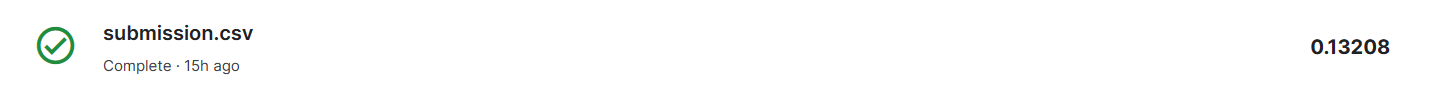